# Exploratory Data Analysis

___

### Table Of Contents

1. Import libraries as needed
2. Expand maximum range of rows
3. Import athleisure dataset
4. Find total volume per engine
5. Find average search volume each month across all engines
6. Find average volume for each keyword on each search engine

___

### 1. Import libraries as needed

In [125]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import json
import sklearn
from scipy import stats
from scipy.stats import norm
from sklearn.utils import resample
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

___

### 2. Expand maximum range of rows

May be a good idea to expand the maximum range of rows to view in your Pandas dataframes.<br>
Use <b>pd.set_option()</b>

In [11]:
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.width', 3000)

___

### 3. Import athleisure dataset

In [285]:
df = pd.read_csv("/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/athleisure.csv")
df.head()

,Unnamed: 0,keyword,volume,year,month,engine,total_volume_for_last_12_months,avg_volume_for_last_12_months,total_months_seen
0,0,yoga pants,0,2018,6,google,779,65,12
1,1,yoga pants,68,2018,7,google,779,65,12
2,2,yoga pants,107,2018,8,google,779,65,12
3,3,yoga pants,63,2018,9,google,779,65,12
4,4,yoga pants,72,2018,10,google,779,65,12


___

### 4. Find total volume per engine

In [182]:
#load .csv files - previously created from Wordtracker API calls

total_volume_usa_google = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/google_stats.csv')
total_volume_usa_youtube = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/youtube_stats.csv')
total_volume_usa_amazon = pd.read_csv('/Users/alexandercheng/Desktop/code/projects/athleisure-ads-strategy/data/amazon_stats.csv')

In [183]:
#concat all 3 dataframes into 1

total_volume_usa = pd.concat([total_volume_usa_google, total_volume_usa_youtube, total_volume_usa_amazon])

In [184]:
#only show what we care about - sum, engine, and country

total_volume_usa = total_volume_usa.drop(['max', 'count', 'avg', 'volume'], axis=1)
total_volume_usa

,sum,engine,country_code
0,594234483,google,US
0,60508218,youtube,US
0,11653715,amazon,US


#### Plot total volume on Google vs. YouTube vs. Amazon

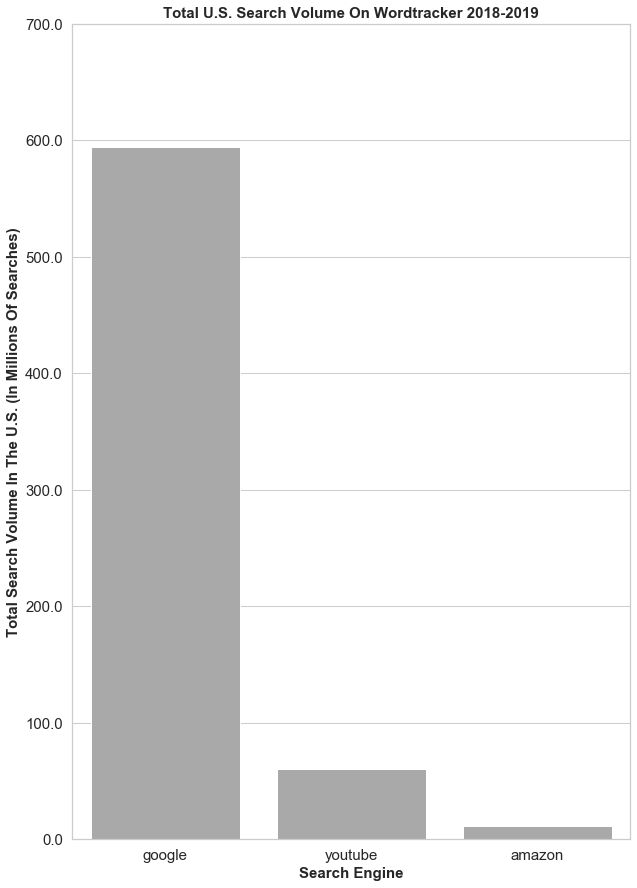

In [316]:
#barplot of total search volume across all 3 major search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(10,15)
ax = sns.barplot(x="engine", y="sum", ci=None, color='darkgrey', data=total_volume_usa)
plt.xlabel('Search Engine', fontsize=15, weight = 'bold')
plt.ylabel('Total Search Volume In The U.S. (In Millions Of Searches)', fontsize=15, weight = 'bold')
plt.title('Total U.S. Search Volume On Wordtracker 2018-2019', fontsize=15, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.show()

#### Initial Observations

Between the 3 search engines, <b>Google clearly has the vastest total U.S. search volume compared to YouTube and Amazon.</b> Google's U.S. search volume (about 600 million) in the Wordtracker database is approximately 10x larger than YouTube (about 60 million), and 50x larger than Amazon (about 12 million). Based on this, we might guess that Google will have the largest search volumes for each "athleisure" related keyword, just because of its sheer volume.

### 5. Find average search volume each month across all engines

#### Get DataFrames for each month separately

In [286]:
df_1 = df.loc[df['month']==1]
df_2 = df.loc[df['month']==2]
df_3 = df.loc[df['month']==3]
df_4 = df.loc[df['month']==4]
df_5 = df.loc[df['month']==5]
df_6 = df.loc[df['month']==6]
df_7 = df.loc[df['month']==7]
df_8 = df.loc[df['month']==8]
df_9 = df.loc[df['month']==9]
df_10 = df.loc[df['month']==10]
df_11 = df.loc[df['month']==11]
df_12 = df.loc[df['month']==12]

dfs_by_month = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]

In [287]:
means = []
for df in dfs_by_month:
    means.append(df['volume'].mean())

In [298]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [289]:
means

[3250.9583333333335,
 3286.5046296296296,
 2351.0694444444443,
 1971.4398148148148,
 1977.6759259259259,
 0.0,
 2727.3935185185187,
 2428.527777777778,
 2697.722222222222,
 2426.25,
 3531.1111111111113,
 3862.7731481481483]

In [335]:
months_and_means = {'month': months, 'mean': means}
means_by_month = pd.DataFrame(data=months_and_means)
display(means_by_month)
display(means_by_month.describe())

,month,mean
0,Jan,3250.958333
1,Feb,3286.504630
2,Mar,2351.069444
3,Apr,1971.439815
4,May,1977.675926
5,Jun,0.000000
6,Jul,2727.393519
7,Aug,2428.527778
8,Sep,2697.722222
9,Oct,2426.250000


,mean
count,12.000000
mean,2542.618827
std,1000.309052
min,0.000000
25%,2257.721065
50%,2563.125000
75%,3259.844907
max,3862.773148


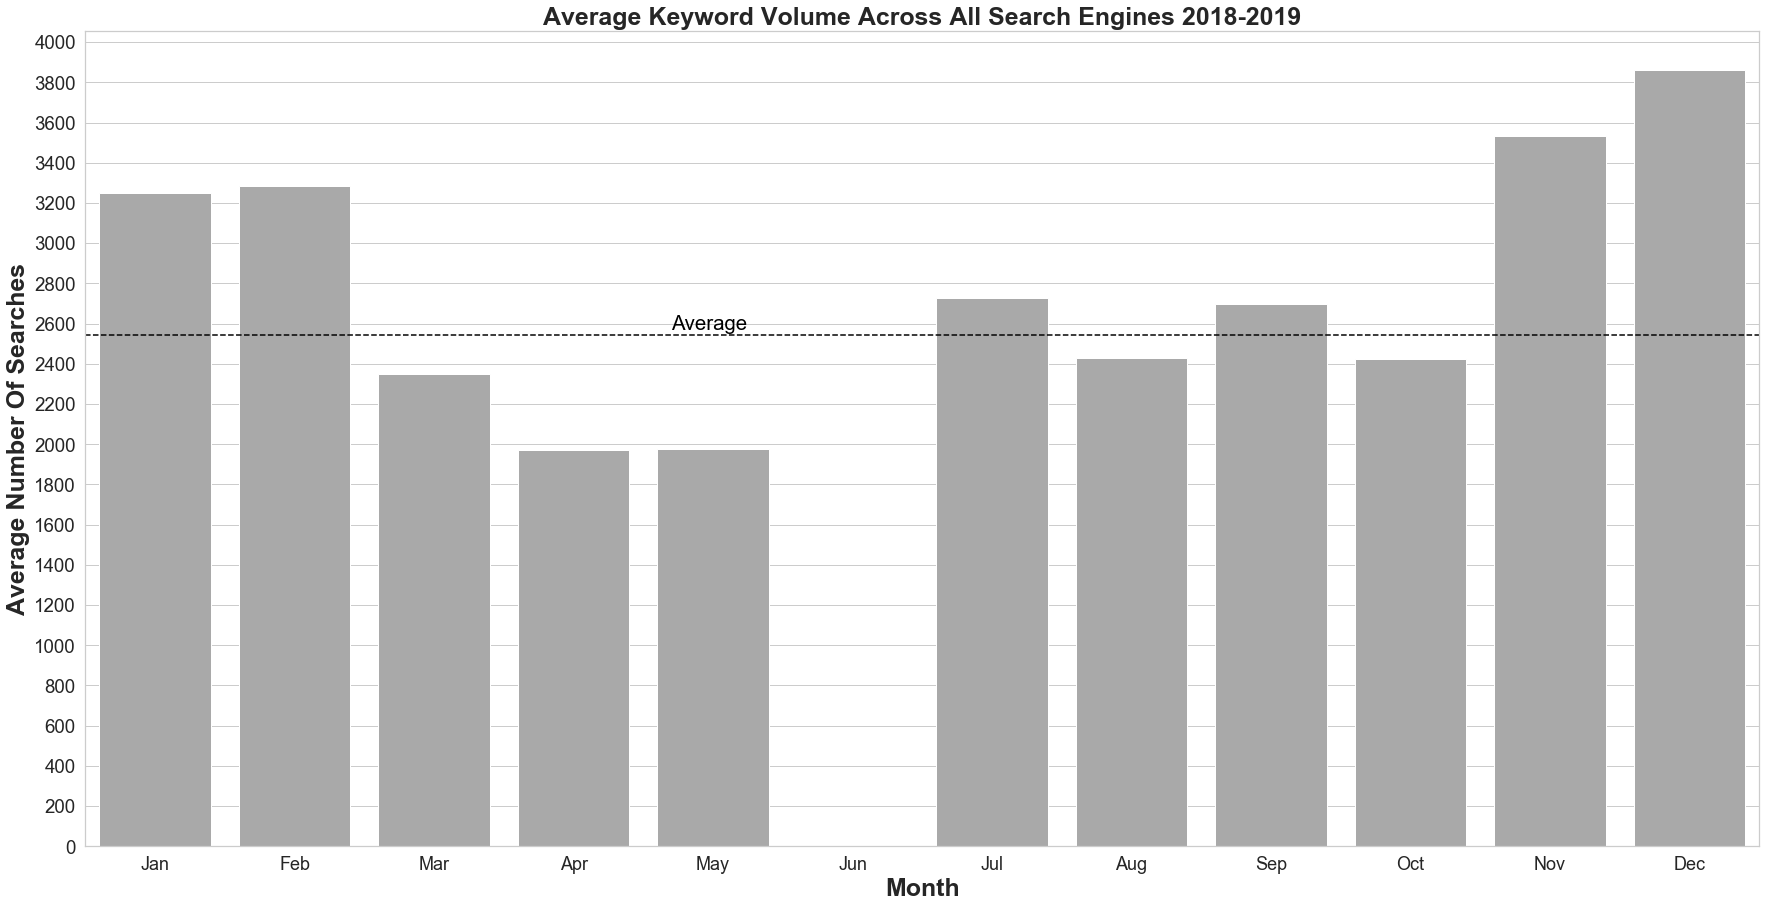

In [413]:
#barplot of average volumes by month for all selected keywords aggregated across all 3 search engines

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="month", y="mean", ci=None, color='darkgrey', data=means_by_month)
plt.xlabel('Month', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches', fontsize=25, weight = 'bold')
plt.title('Average Keyword Volume Across All Search Engines 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=0)
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(2542.618827, ls='--', color='black')
ax.text(3.7,2570, "Average", color='black')
plt.show()

#### Initial Observations

Across all 3 search engines, the plot suggests that the <b>colder months</b> in the United States have the highest average number of searches regarding "athleisure" related keywords. This includes the months of January, February, November, and December. December is the maximum at an average of 3862 athleisure related searches. June is the minimum with 0 athleisure related searches. The average number of searches across all 3 search engines is about 2543 searches in any given month.

___

### 6. Find average volume for each keyword on each search engine

#### Keyword average volume per month for Google searches

In [156]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "google" only.
df_unique_keywords_google = df_unique_keywords[df_unique_keywords.engine == 'google']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_google = df_unique_keywords_google.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
0,yoga pants,65,google
12,sweatpants,62,google
24,sweatshirt,288,google
108,crew neck,29,google
120,thumb hole,1,google
132,pullover,19,google
144,fleece,62,google
156,joggers,110,google
168,hoodie,157,google
180,hooded,35,google


#### Renumber index

In [157]:
df_unique_keywords_google = df_unique_keywords_google.reset_index(drop=True)
df_unique_keywords_google

,keyword,avg_volume_for_last_12_months,engine
0,yoga pants,65,google
1,sweatpants,62,google
2,sweatshirt,288,google
3,crew neck,29,google
4,thumb hole,1,google
5,pullover,19,google
6,fleece,62,google
7,joggers,110,google
8,hoodie,157,google
9,hooded,35,google


In [330]:
display(df_unique_keywords_google.describe())
display(df_unique_keywords_google.min())
display(df_unique_keywords_google.max())

,avg_volume_for_last_12_months
count,77.000000
mean,74.350649
std,118.716687
min,1.000000
25%,7.000000
50%,29.000000
75%,71.000000
max,575.000000


keyword                          3 stripes
avg_volume_for_last_12_months            1
engine                              google
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months           575
engine                               google
dtype: object

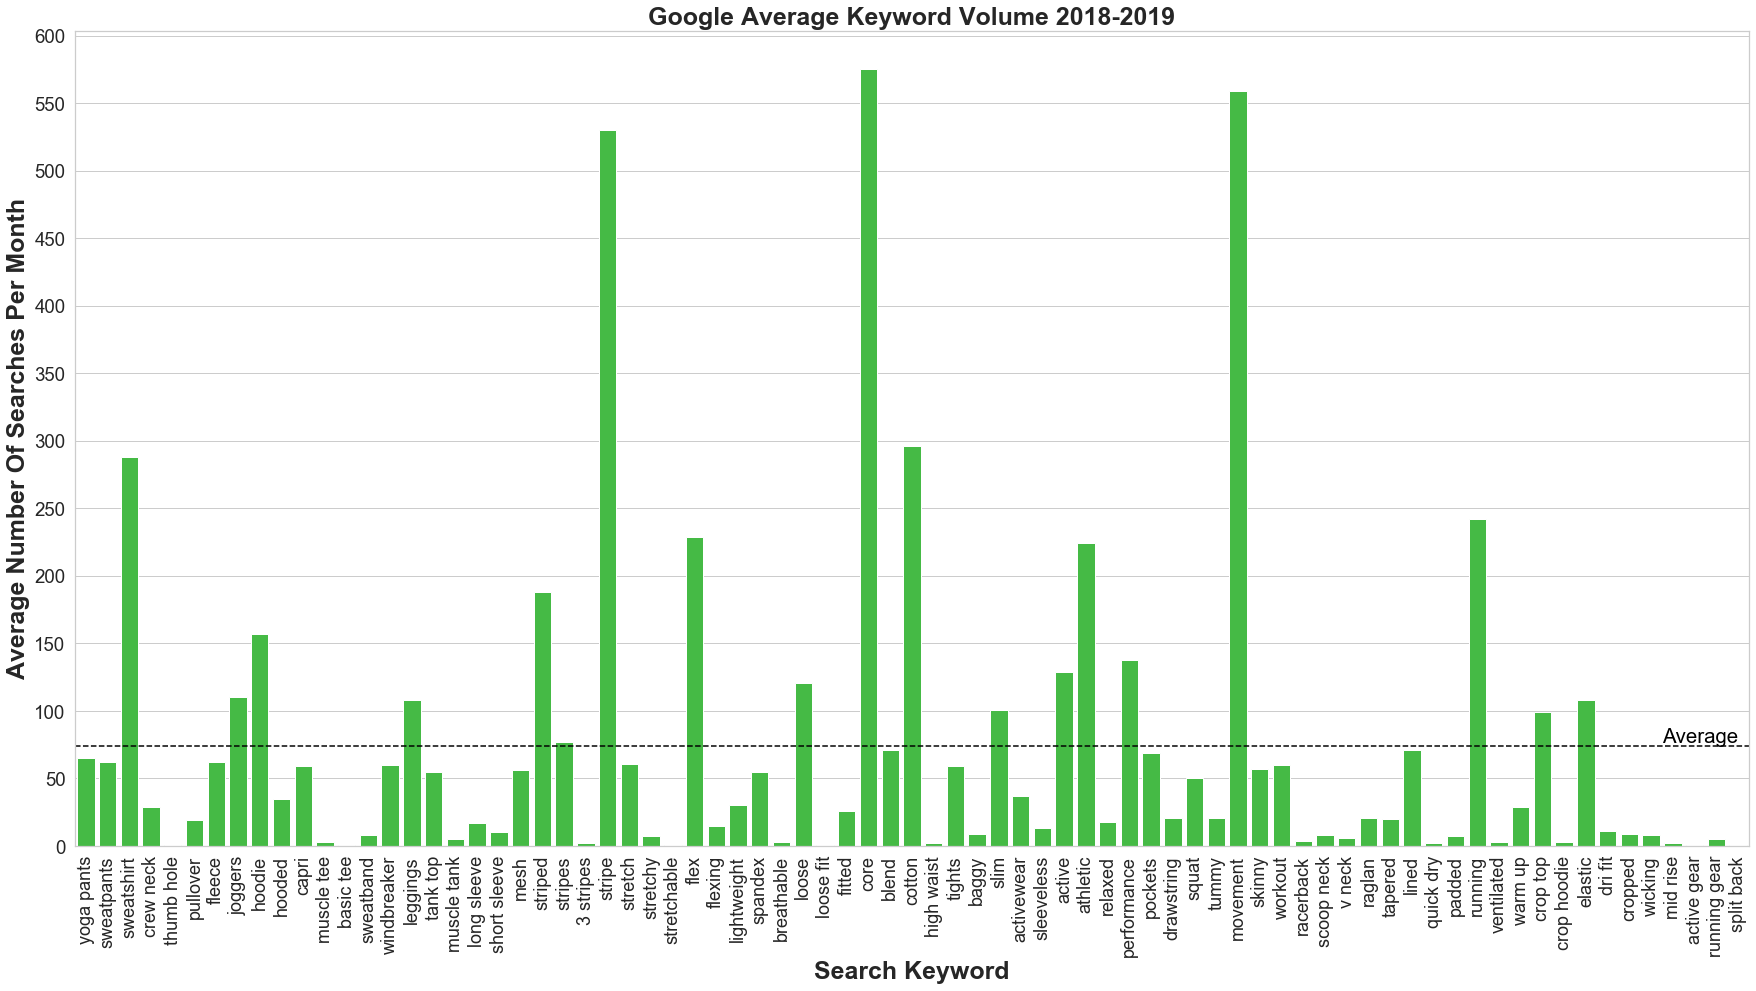

In [406]:
#barplot of average keyword volumes on Google
#find colors here: https://python-graph-gallery.com/196-select-one-color-with-matplotlib/

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='limegreen', data=df_unique_keywords_google)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Google Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(74.350649, ls='--', color='black')
ax.text(72.5,77, "Average", color='black')
plt.show()

#### Initial Observations

Given that the Wordtracker database has nearly 600 million Google searches for the United States, it is a bit surprising to see that the maximum average for any given athleisure related keyword in our study is less than 600 searches, and not in the thousands. The average number of athleisure related searches is only about 74 searches per month on Google. The plot shows that there are several outstanding keywords related to athleisure. <b>"Core"</b> is the maximum with an average of 575 searches per month. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0, including: <b>"thumb hole"</b>, <b>"basic tee"</b>, <b>"stretchable"</b>, <b>"loose fit"</b>, and <b>"active gear"</b>.

#### Keyword average volume per month for YouTube searches

In [159]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "youtube" only.
df_unique_keywords_youtube = df_unique_keywords[df_unique_keywords.engine == 'youtube']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_youtube = df_unique_keywords_youtube.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
36,yoga pants,946,youtube
48,sweatpants,1637,youtube
60,sweatshirt,63902,youtube
228,thumb hole,1,youtube
240,pullover,13,youtube
252,fleece,24,youtube
264,hoodie,69691,youtube
276,hooded,28,youtube
288,capri,2,youtube
300,muscle tee,1,youtube


#### Renumber index

In [160]:
df_unique_keywords_youtube = df_unique_keywords_youtube.reset_index(drop=True)
df_unique_keywords_youtube

,keyword,avg_volume_for_last_12_months,engine
0,yoga pants,946,youtube
1,sweatpants,1637,youtube
2,sweatshirt,63902,youtube
3,thumb hole,1,youtube
4,pullover,13,youtube
5,fleece,24,youtube
6,hoodie,69691,youtube
7,hooded,28,youtube
8,capri,2,youtube
9,muscle tee,1,youtube


In [331]:
display(df_unique_keywords_youtube.describe())
display(df_unique_keywords_youtube.min())
display(df_unique_keywords_youtube.max())

,avg_volume_for_last_12_months
count,66.000000
mean,4629.530303
std,13520.989579
min,1.000000
25%,1.000000
50%,26.000000
75%,1728.750000
max,69691.000000


keyword                          3 stripes
avg_volume_for_last_12_months            1
engine                             youtube
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         69691
engine                              youtube
dtype: object

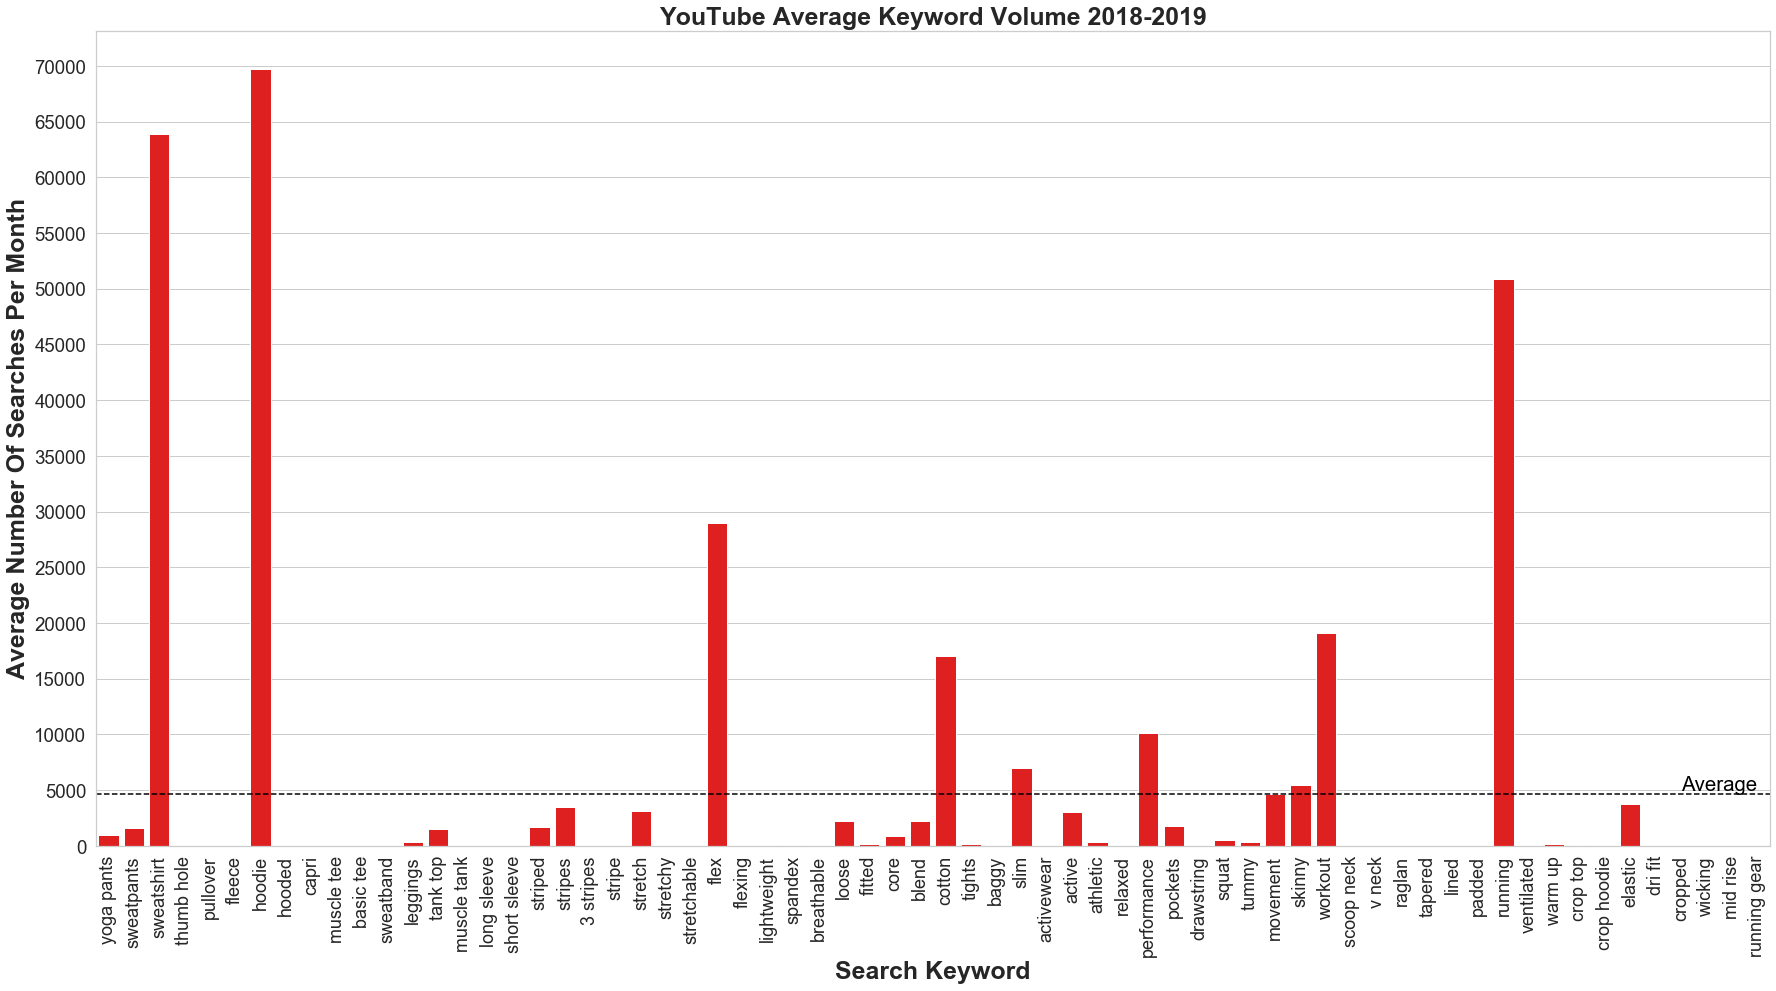

In [392]:
#barplot of average keyword volumes on YouTube

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='red', data=df_unique_keywords_youtube)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('YouTube Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(4629.530303, ls='--', color='black')
ax.text(62,5000, "Average", color='black')
plt.show()

#### Initial Observations

The results for YouTube are very surprising compared to the plot of average keyword volume for Google searches. <b>Average search volume for "athleisure" related terms is much higher on YouTube than Google.</b> The average number of athleisure related searches per month is a whooping 4630 on YouTube, compared to a tiny 74 searches per month on Google! The plot shows dramatically high-performing keywords related to athleisure. <b>"Hoodie"</b> is the maximum with an average of 69,691 searches per month. The keywords: <b>"sweatshirt"</b> and <b>"running"</b> also have very high search volume averages.  The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google searches.

#### Keyword average volume per month for Amazon searches

In [162]:
#just get the columns that matter.
df_unique_keywords = df[['keyword', 'avg_volume_for_last_12_months', 'engine']].copy()

#get keywords where engine = "amazon" only.
df_unique_keywords_amazon = df_unique_keywords[df_unique_keywords.engine == 'amazon']

#drop duplicate keywords - you only need 1 that shows the avg_volume.
df_unique_keywords_amazon = df_unique_keywords_amazon.drop_duplicates(subset='keyword', keep="first")

df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
72,yoga pants,7088,amazon
84,sweatpants,10063,amazon
96,sweatshirt,8758,amazon
324,crew neck,180,amazon
336,thumb hole,33,amazon
348,pullover,1442,amazon
360,fleece,3958,amazon
372,joggers,17970,amazon
384,hoodie,28924,amazon
396,hooded,894,amazon


#### Renumber index

In [163]:
df_unique_keywords_amazon = df_unique_keywords_amazon.reset_index(drop=True)
df_unique_keywords_amazon

,keyword,avg_volume_for_last_12_months,engine
0,yoga pants,7088,amazon
1,sweatpants,10063,amazon
2,sweatshirt,8758,amazon
3,crew neck,180,amazon
4,thumb hole,33,amazon
5,pullover,1442,amazon
6,fleece,3958,amazon
7,joggers,17970,amazon
8,hoodie,28924,amazon
9,hooded,894,amazon


In [332]:
display(df_unique_keywords_amazon.describe())
display(df_unique_keywords_amazon.min())
display(df_unique_keywords_amazon.max())

,avg_volume_for_last_12_months
count,72.000000
mean,3307.652778
std,6129.068668
min,3.000000
25%,146.750000
50%,777.500000
75%,3934.000000
max,32460.000000


keyword                          active
avg_volume_for_last_12_months         3
engine                           amazon
dtype: object

keyword                          yoga pants
avg_volume_for_last_12_months         32460
engine                               amazon
dtype: object

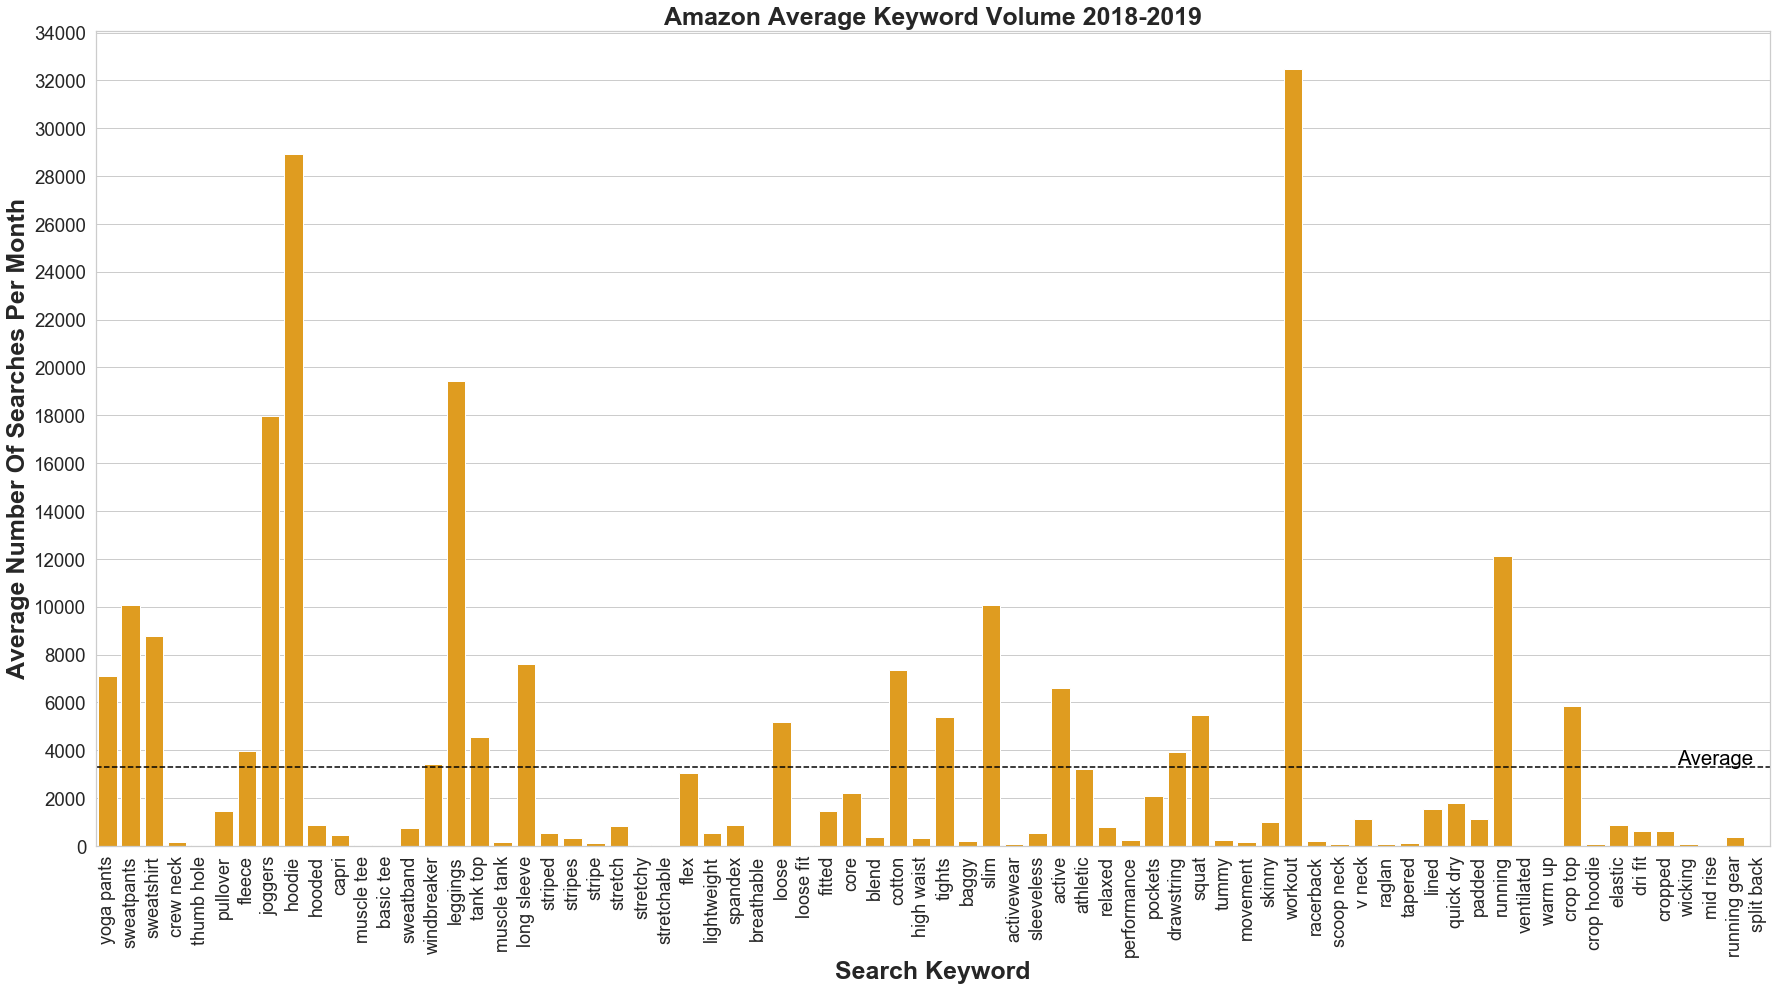

In [394]:
#barplot of average keyword volumes on Amazon

sns.set(style="whitegrid", color_codes=True, font_scale=1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
ax = sns.barplot(x="keyword", y="avg_volume_for_last_12_months", ci=None, color='orange', data=df_unique_keywords_amazon)
plt.xlabel('Search Keyword', fontsize=25, weight = 'bold')
plt.ylabel('Average Number Of Searches Per Month', fontsize=25, weight = 'bold')
plt.title('Amazon Average Keyword Volume 2018-2019', fontsize=25, weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=90)
ax.yaxis.set_major_locator(ticker.MultipleLocator(2000))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(3307.652778, ls='--', color='black')
ax.text(67.5,3400, "Average", color='black')
plt.show()

#### Initial Observations

The results for Amazon are also very surprising compared to Google. <b>Average search volume for "athleisure" related terms is much higher on Amazon than Google, but less than YouTube.</b> The average number of athleisure related searches per month on Amazon is 3307, which is less than 4630 per month on YouTube, and much more than 74 searches per month on Google. Like YouTube, the Amazon plot above shows some very high-performing keywords related to athleisure. <b>"Workout"</b> is the maximum with an average of 32,460 searches per month. <b>"Hoodie"</b> is a close second, with <b>"leggings"</b> and <b>"joggers"</b> also at high search volume averages. The minimum is actually 0, not 1 - which the .describe() method provided us above. There are several keywords with a search volume of 0 here, just like Google and YouTube searches.